<a href="https://colab.research.google.com/github/Sayandeep27/ML-DL-Codes/blob/main/Customer_Segmentation_and_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
# Load the dataset (example assuming you have an 'ecommerce_data.csv' file)
data = pd.read_csv('e_commerce.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37309 entries, 0 to 37308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    37309 non-null  object 
 1   StockCode    37309 non-null  object 
 2   Description  37192 non-null  object 
 3   Quantity     37309 non-null  int64  
 4   InvoiceDate  37309 non-null  object 
 5   UnitPrice    37308 non-null  float64
 6   CustomerID   24429 non-null  float64
 7   Country      37308 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [5]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      117
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     12880
Country            1
dtype: int64

In [6]:

# Data cleaning and feature engineering
data.dropna(inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [7]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

In [8]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [9]:
# Feature scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [10]:
# Customer segmentation using K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Neural network for Customer Lifetime Value (CLV) prediction
# Prepare data for CLV prediction
X = rfm.drop(['CustomerID', 'Cluster'], axis=1)
y = rfm['Monetary']


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


In [14]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
23/23 [==============================] - 2s 18ms/step - loss: 933153.4375 - val_loss: 1548995.5000
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 477668.2812 - val_loss: 591972.1875
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 126892.6719 - val_loss: 79132.8672
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 65581.6250 - val_loss: 3197.7976
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 44607.7031 - val_loss: 448.7059
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 13049.0107 - val_loss: 6299.1431
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 27796.9883 - val_loss: 21885.4551
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 20676.9023 - val_loss: 2082.8127
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 10674.0078 - val_loss: 282.4717
Epoch 10/50
23/23 [===========================

In [16]:
# Predict CLV
clv_predictions = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [17]:
# Evaluate model performance (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(y_test, clv_predictions))
print(f'Root Mean Squared Error (CLV Prediction): {rmse}')

Root Mean Squared Error (CLV Prediction): 55.748141894131315


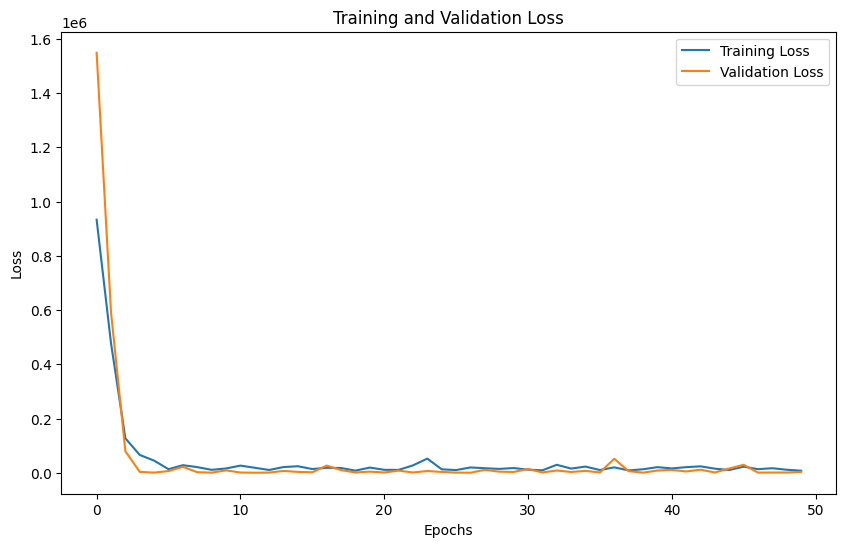

In [18]:
# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

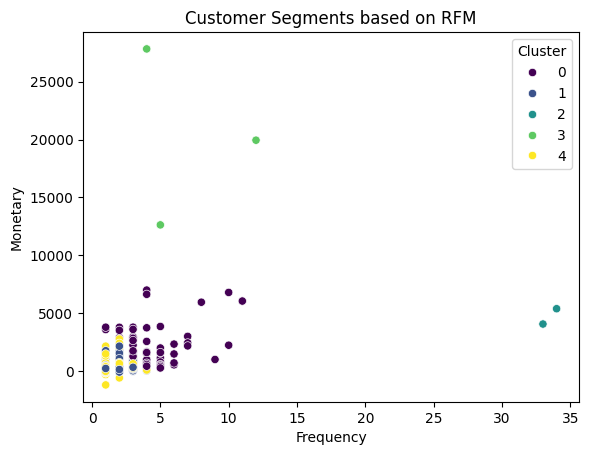

In [19]:
# Visualize customer segments
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments based on RFM')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

#This advanced project combines machine learning, deep learning, and statistical techniques to solve a marketing challenge of customer segmentation and lifetime value prediction. The integration of RFM analysis, clustering algorithms, neural networks for CLV prediction, and thorough model evaluation ensures a robust solution that can provide actionable insights for marketing strategies in e-commerce or any customer-centric business. For a complete end-to-end implementation, further details on data preprocessing, hyperparameter tuning, and deployment specifics would be required based on the actual dataset and business context